In [11]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

folder_path = 'group1_faces/train'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

features = []
for image_file in image_files:
    image = Image.open(os.path.join(folder_path, image_file))
    gray_image = image.convert('L')
    resized_image = gray_image.resize((256, 256))
    feature_vector = np.array(resized_image).flatten()
    features.append(feature_vector)

X = np.array(features)

pca = PCA(n_components=4)
pca.fit(X)

eigenfaces = pca.components_
X_projected = pca.transform(X)

In [12]:
y_train = ['Duy']*5 + ['Duy Anh']*7 + ['Huy']*5 + ['Nghia']*5 + ['Thanh']*5

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_projected, y_train)

y_predict = []
new_faces = []
folder_path = 'group1_faces/test'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
for image_file in image_files:
    new_face = Image.open(os.path.join(folder_path, image_file))
    new_face = new_face.convert('L')
    new_faces.append(new_face)
    new_face = new_face.resize((256, 256))
    new_face = np.array(new_face).flatten()

    new_face_centered = new_face
    new_face_projected = pca.transform(new_face.reshape(1, -1))
    
    predicted_label = knn.predict(new_face_projected)
    y_predict.append(predicted_label[0])


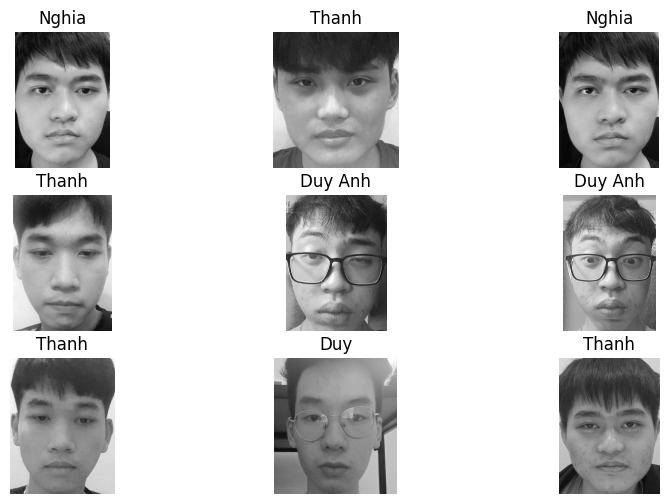

In [13]:
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(new_faces[i], cmap='gray')
    ax.set_title(y_predict[i])
    ax.axis('off')